In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#w[0]*x[0] + w[1]*x[1] + ...
def calculate_dot_product(v1,v2):
    dims = v1.shape[0]
    dot_product = 0
    
    for i in range(dims):
        dot_product = dot_product + v1[i]*v2[i]
    
    return dot_product

In [3]:
#w[0]*x[0] + w[1]*x[1] + ...
def vector_len(v1):
    dims = v1.shape[0]
    length = 0
    
    for i in range(dims):
        length = length + pow(v1[i],2)
    
    return length

In [4]:
def vector_normalization(v1):
    v1_len = vector_len(v1)
    arr = []
    
    for item in v1:
        arr.append(item/v1_len)
    
    return np.array(arr)

In [5]:
def shift(v1, theta):
    dims = v1.shape[0]
    v1_sum = 0
    
    for i in range(dims):
        v1_sum = v1_sum + pow(v1[i],2)
        
    return (theta/sqrt(v1_sum)) * (v1/(sqrt(v1_sum)))

### Zadanie - dwa wymiary

In [6]:
theta = 1
w = np.array([4, 2])
x = np.array([1, 3])

### Wektor W
\begin{bmatrix}
4\\
2
\end{bmatrix}

### Wektor X
\begin{bmatrix}
1\\
3
\end{bmatrix}

### Równanie prostej przechodzącej przez wektor W:
$$y = ax$$
$$2 = 4a$$
$$a = 1/2$$

### Równanie prostej wyznaczającej hiperpłaszczyznę:
$$y = (x*W1 - T)/(-W2)$$
$$y = (x*4 - 1)/(-2)$$
$$y = -2x + (1/2)$$

In [7]:
# iloczyn skalarny
dot_product = calculate_dot_product(w,x)
dot_product

10

In [8]:
# długość wektora W
w_len = vector_len(w)
w_len

20.0

In [9]:
# znormalizowany wektor W
w_normalized = vector_normalization(w)
w_normalized

array([0.2, 0.1])

In [10]:
# X zrzutowane na W
x_proj_w = w_normalized * dot_product
x_proj_w

array([2., 1.])

In [11]:
# różnica wektorów X i [X rzutowane na W]
# potem z przesunięciem da punkt projekcji
diff = x - x_proj_w
diff

array([-1.,  2.])

In [12]:
# przesunięcie theta względem wektora W
v_shift = shift(w,theta)
v_shift

array([0.2, 0.1])

In [13]:
# projekcja 
projection = diff + v_shift
projection

array([-0.8,  2.1])

In [14]:
# refleksja
reflection = x - 2 * (x - projection)
reflection

array([-2.6,  1.2])

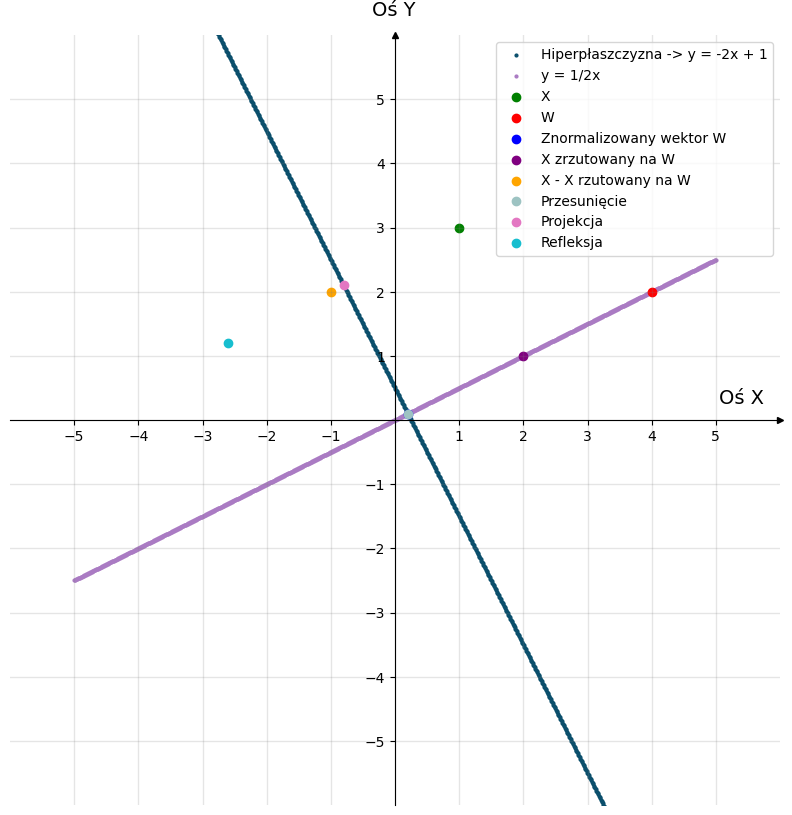

In [15]:
# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))

lx1 = np.linspace(-5, 5, 1000)
#ly1 = -2 * lx1 + 1
ly1 = -2 * lx1 + (1/2)
ax.scatter(lx1, ly1, color='#0b4f6c', label='Hiperpłaszczyzna -> y = -2x + 1', s=4)

lx2 = np.linspace(-5, 5, 1000)
ly2 = 1/2 * lx2
ax.scatter(lx2, ly2, color='#aa7bc3', label='y = 1/2x', s=4)

ax.scatter(x[0], x[1], color='green', label='X')
ax.scatter(w[0], w[1], color='red', label='W')
ax.scatter(w_normalized[0], w_normalized[1], color='blue', label='Znormalizowany wektor W')
ax.scatter(x_proj_w[0], x_proj_w[1], color='purple', label='X zrzutowany na W')
ax.scatter(diff[0], diff[1], color='orange', label='X - X rzutowany na W')
ax.scatter(v_shift[0], v_shift[1], color='#9dc3c2', label='Przesunięcie')
ax.scatter(projection[0], projection[1], color='#e377c2', label='Projekcja')
ax.scatter(reflection[0], reflection[1], color='#17becf', label='Refleksja')


# Draw lines connecting points to axes
#for x, y, c in zip(xs, ys, colors):
#    ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
#    ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)

# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('Oś X', size=14, labelpad=-40, x=0.95)
ax.set_ylabel('Oś Y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.legend()
plt.show()

### Zadanie - trzy wymiary

In [16]:
theta = 1
w = np.array([1, 3, 2])
x = np.array([2, 3, 1])

### Wektor W
\begin{bmatrix}
1\\
3\\
2
\end{bmatrix}

### Wektor X
\begin{bmatrix}
2\\
3\\
1
\end{bmatrix}

In [17]:
# iloczyn skalarny
dot_product = calculate_dot_product(w,x)
dot_product

13

In [18]:
# długość wektora W
w_len = vector_len(w)
w_len

14.0

In [19]:
# znormalizowany wektor W
w_normalized = vector_normalization(w)
w_normalized

array([0.07142857, 0.21428571, 0.14285714])

In [20]:
# X zrzutowane na W
x_proj_w = w_normalized * dot_product
x_proj_w

array([0.92857143, 2.78571429, 1.85714286])

In [21]:
# różnica wektorów X i [X rzutowane na W]
# potem z przesunięciem da punkt projekcji
diff = x - x_proj_w
diff

array([ 1.07142857,  0.21428571, -0.85714286])

In [22]:
# przesunięcie theta względem wektora W
v_shift = shift(w,theta)
v_shift

array([0.07142857, 0.21428571, 0.14285714])

In [23]:
# projekcja 
projection = diff + v_shift
projection

array([ 1.14285714,  0.42857143, -0.71428571])

In [24]:
# refleksja
reflection = x - 2 * (x - projection)
reflection

array([ 0.28571429, -2.14285714, -2.42857143])

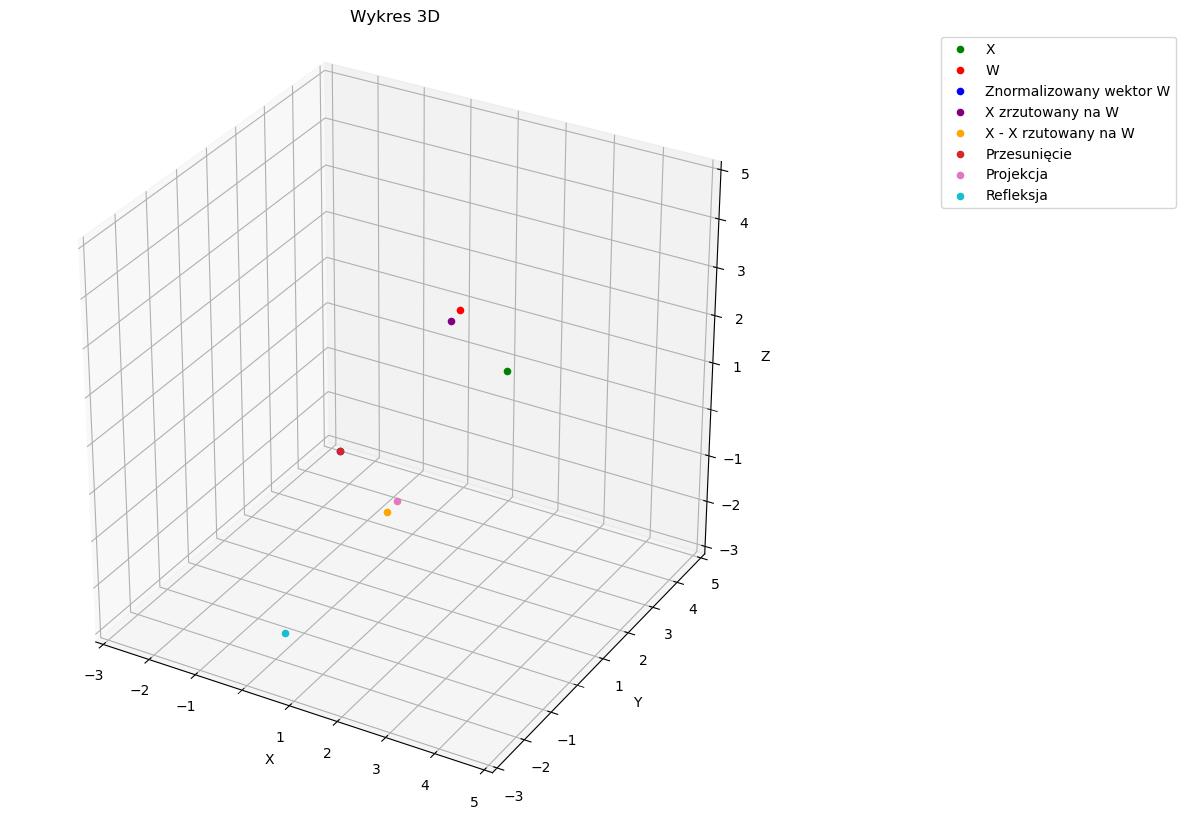

In [25]:
xmin, xmax, ymin, ymax, zmin, zmax = -3, 5, -3, 5, -3, 5
ticks_frequency = 1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[0], x[1], x[2], color='green', label='X')
ax.scatter(w[0], w[1], w[2], color='red', label='W')
ax.scatter(w_normalized[0], w_normalized[1], w_normalized[2], color='blue', label='Znormalizowany wektor W')
ax.scatter(x_proj_w[0], x_proj_w[1], x_proj_w[2], color='purple', label='X zrzutowany na W')
ax.scatter(diff[0], diff[1], diff[2], color='orange', label='X - X rzutowany na W')
ax.scatter(v_shift[0], v_shift[1], v_shift[2], color='#d62728', label='Przesunięcie')
ax.scatter(projection[0], projection[1], projection[2], color='#e377c2', label='Projekcja')
ax.scatter(reflection[0], reflection[1], reflection[2], color='#17becf', label='Refleksja')

# Set identical scales for both axes
#ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), zlim=(zmin-1, zmax+1), aspect='equal')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(zmin, zmax), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
z_ticks = np.arange(zmin, zmax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])
ax.set_zticks(z_ticks[z_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)
ax.set_zticks(np.arange(zmin, zmax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wykres 3D')
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
plt.show()